CMPE 258 Assignment #1 
1. Author: Tu Lan 011495497 tu.lan@sjsu.edu
2. Date: 02/03/2018
3. Tips: Before running the code, please change the Directories to yours, especially the directory of datasets

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# basic libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('seaborn')

# Directories
PROJECT_ROOT_DIR = '/home/tulan/PycharmProjects/Google/Machine_Learning/CMPE258/HW1'
DATA_DIR = '/home/tulan/PycharmProjects/Google/Machine_Learning/CMPE258/data'

# Where to save the figures
IMAGE_FOLD = 'images'
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, IMAGE_FOLD)

def save_fig(fig_id, tight_layout=True):
    if not os.path.exists(IMAGE_DIR):
        os.makedirs(IMAGE_DIR)
    path = os.path.join(IMAGE_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Qestion 1.  Linear regression with one variable from scratch


In [2]:
df1 = pd.read_csv(DATA_DIR + '/ex1data1.csv', header=None)
df1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df1.columns = ['population', 'profit']
df1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X = df1['population'].values.reshape(-1, 1)
y = df1['profit'].values.reshape(-1, 1)
X.shape, y.shape

((97, 1), (97, 1))

Visualize the data by scatter plot

Saving figure scatter plot


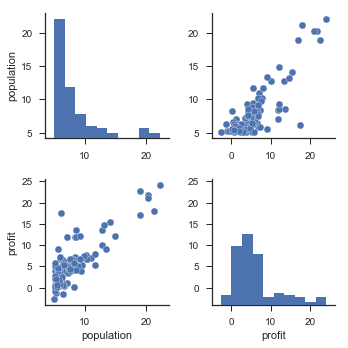

In [5]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df1)
save_fig('scatter plot')

Gradient descent one variable with no Matrix calculation, using iterations

In [6]:
from sklearn.preprocessing import StandardScaler
class LR_NoMatrix(object):
    def __init__(self, alpha=0.1, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter

    def scale(self, X):
        self.sc_X = StandardScaler()
        self.X_std = self.sc_X.fit_transform(X)
        return self

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.scale(X)
        self.weights = np.zeros((X.shape[1] + 1, ))
        self.cost = []
        self.n = X.shape[0]

        for i in range(self.n_iter):
            SE_sum = 0
            dw0_sum = 0
            dw1_sum = 0
            for j in range(self.n):
                y_pred = self.predict(self.X_std[j][0])
                SE_sum += (y_pred-y[j]) ** 2
                dw0_sum += (y_pred - y[j]) * 2
                dw1_sum += (y_pred - y[j]) * self.X_std[j][0] * 2
            
            cost_temp = (SE_sum / self.n) ** 0.5
            if (i+1) % 10 == 0: 
                print('n_iter: %d, RMSE: %f' % (i+1, cost_temp))
            dw0 = dw0_sum / self.n
            dw1 = dw1_sum / self.n
            self.cost.append(cost_temp)
            self.weights[0] -= self.alpha * dw0
            self.weights[1] -= self.alpha * dw1
                
        return self

    def predict(self, xi):
        predict_std = self.weights[0] + self.weights[1] * xi
        return predict_std
    
    def predict_all(self):
        y_pred_all = []
        for xi in self.X_std:
            predict_std = self.weights[0] + self.weights[1] * xi
            y_pred_all.append(predict_std)
        return y_pred_all

    def plotFinal(self, xlabel='X', ylabel='y', title='Linear Regression'):
        plt.plot(self.X, self.y, "b.")
        plt.plot(self.X, self.predict_all(), "g-")
        plt.legend(loc='lower right')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.axis([min(self.X) - 1, max(self.X) + 1, min(self.y) - 1, max(self.y) + 1])

In [ ]:

# learning rate = 0.1
lr = LR_NoMatrix(alpha=0.1, n_iter=100)
lr.fit(X, y)

In [8]:
# learning rate = 1
lr = LR_NoMatrix(alpha=1, n_iter=100)
lr.fit(X, y)

n_iter: 10, RMSE: 8.009087
n_iter: 20, RMSE: 8.009087
n_iter: 30, RMSE: 8.009087
n_iter: 40, RMSE: 8.009087
n_iter: 50, RMSE: 8.009087
n_iter: 60, RMSE: 8.009087
n_iter: 70, RMSE: 8.009087
n_iter: 80, RMSE: 8.009087
n_iter: 90, RMSE: 8.009087
n_iter: 100, RMSE: 8.009087


Not converge when learning rate = 1

In [9]:
# learning rate = 0.01
lr = LR_NoMatrix(alpha=0.01, n_iter=400)
lr.fit(X, y)

n_iter: 10, RMSE: 6.878919
n_iter: 20, RMSE: 5.879380
n_iter: 30, RMSE: 5.104263
n_iter: 40, RMSE: 4.513285
n_iter: 50, RMSE: 4.071268
n_iter: 60, RMSE: 3.747262
n_iter: 70, RMSE: 3.514363
n_iter: 80, RMSE: 3.349877
n_iter: 90, RMSE: 3.235414
n_iter: 100, RMSE: 3.156687


n_iter: 110, RMSE: 3.103017
n_iter: 120, RMSE: 3.066664
n_iter: 130, RMSE: 3.042152
n_iter: 140, RMSE: 3.025677
n_iter: 150, RMSE: 3.014629
n_iter: 160, RMSE: 3.007230
n_iter: 170, RMSE: 3.002280
n_iter: 180, RMSE: 2.998971
n_iter: 190, RMSE: 2.996760
n_iter: 200, RMSE: 2.995283
n_iter: 210, RMSE: 2.994296
n_iter: 220, RMSE: 2.993638
n_iter: 230, RMSE: 2.993198
n_iter: 240, RMSE: 2.992904
n_iter: 250, RMSE: 2.992708
n_iter: 260, RMSE: 2.992577
n_iter: 270, RMSE: 2.992490
n_iter: 280, RMSE: 2.992431
n_iter: 290, RMSE: 2.992392
n_iter: 300, RMSE: 2.992366
n_iter: 310, RMSE: 2.992349
n_iter: 320, RMSE: 2.992337
n_iter: 330, RMSE: 2.992329
n_iter: 340, RMSE: 2.992324
n_iter: 350, RMSE: 2.992321
n_iter: 360, RMSE: 2.992319
n_iter: 370, RMSE: 2.992317
n_iter: 380, RMSE: 2.992316
n_iter: 390, RMSE: 2.992315
n_iter: 400, RMSE: 2.992315


When learning rate is 0.1, it coverges to the optimum point, also it is faster.
So I choose my final learning rate to be 0.1

In [10]:
# learning rate = 0.1
lr = LR_NoMatrix(alpha=0.1, n_iter=100)
lr.fit(X, y)

n_iter: 10, RMSE: 3.154074
n_iter: 20, RMSE: 2.994229
n_iter: 30, RMSE: 2.992336
n_iter: 40, RMSE: 2.992314
n_iter: 50, RMSE: 2.992314
n_iter: 60, RMSE: 2.992314
n_iter: 70, RMSE: 2.992314
n_iter: 80, RMSE: 2.992314
n_iter: 90, RMSE: 2.992314
n_iter: 100, RMSE: 2.992314


Saving figure Population vs. Profit


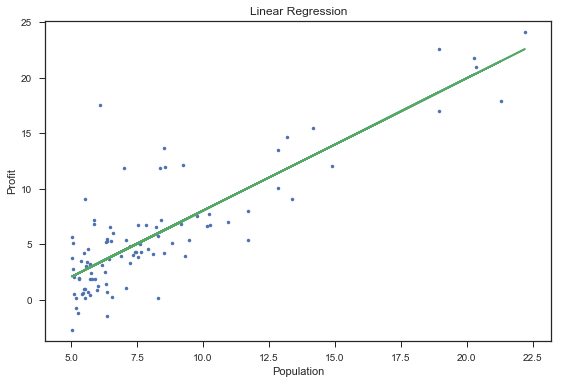

In [11]:
lr.plotFinal(xlabel='Population', ylabel='Profit')
save_fig('Population vs. Profit')

Question 2: Linear regression with two variables from scratch


In [12]:
df2 = pd.read_csv(DATA_DIR + '/ex1data2.csv', header=None)
df2.head()

,0,1,2
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


In [13]:
df2.columns = ['size', 'bedroom', 'price']
df2.head()

,size,bedroom,price
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


In [14]:
X = df2.iloc[:, 0:2].values.astype('float64')
y = df2['price'].values.reshape(-1, 1)
X.shape, y.shape

((47, 2), (47, 1))

Saving figure scatter plot Q2


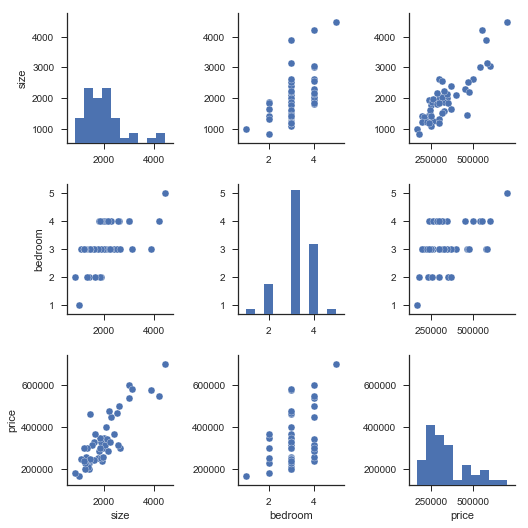

In [15]:
sns.pairplot(df2)
save_fig('scatter plot Q2')

Gradient descent two variables with no Matrix calculation, using iterations

In [16]:
class LR_NoMatrix_TwoVar(object):
    def __init__(self, alpha=0.1, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter

    def scale(self, X):
        self.sc_X = StandardScaler()
        self.X_std = self.sc_X.fit_transform(X)
        return self

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.scale(X)
        self.weights = np.zeros((X.shape[1] + 1, ))
        self.cost = []
        self.n = X.shape[0]

        for i in range(self.n_iter):
            SE_sum = 0
            dw0_sum = 0
            dw1_sum = 0
            dw2_sum = 0
            for j in range(self.n):
                y_pred = self.predict(self.X_std[j])
                SE_sum += (y_pred-y[j]) ** 2
                dw0_sum += (y_pred - y[j]) * 2
                dw1_sum += (y_pred - y[j]) * self.X_std[j][0] * 2
                dw2_sum += (y_pred - y[j]) * self.X_std[j][1] * 2
            
            cost_temp = (SE_sum / self.n) ** 0.5
            if (i+1) % 10 == 0: 
                print('n_iter: %d, RMSE: %f' % (i+1, cost_temp))
            dw0 = dw0_sum / self.n
            dw1 = dw1_sum / self.n
            dw2 = dw2_sum / self.n
            self.cost.append(cost_temp)
            self.weights[0] -= self.alpha * dw0
            self.weights[1] -= self.alpha * dw1
            self.weights[2] -= self.alpha * dw2
                
        return self

    def predict(self, xi):
        predict_std = self.weights[0] + self.weights[1] * xi[0] + self.weights[2] * xi[1]
        return predict_std
    
    def predict_all(self):
        y_pred_all = []
        for i in range(self.n):
            predict_std = self.weights[0] + self.weights[1] * self.X_std[i][0] \
                          + self.weights[2] * self.X_std[i][1]
            y_pred_all.append(predict_std)
        return y_pred_all

In [18]:
# learning rate 0.1
lr_2 = LR_NoMatrix_TwoVar(alpha=0.1, n_iter=200)
lr_2.fit(X, y)

n_iter: 10, RMSE: 82146.888026
n_iter: 20, RMSE: 64807.532389
n_iter: 30, RMSE: 64039.044042
n_iter: 40, RMSE: 63943.784853
n_iter: 50, RMSE: 63928.995156
n_iter: 60, RMSE: 63926.655360
n_iter: 70, RMSE: 63926.284703
n_iter: 80, RMSE: 63926.225981
n_iter: 90, RMSE: 63926.216678
n_iter: 100, RMSE: 63926.215204
n_iter: 110, RMSE: 63926.214970
n_iter: 120, RMSE: 63926.214933
n_iter: 130, RMSE: 63926.214927
n_iter: 140, RMSE: 63926.214926
n_iter: 150, RMSE: 63926.214926
n_iter: 160, RMSE: 63926.214926
n_iter: 170, RMSE: 63926.214926
n_iter: 180, RMSE: 63926.214926
n_iter: 190, RMSE: 63926.214926
n_iter: 200, RMSE: 63926.214926


In [20]:
# learning rate 1
lr_2 = LR_NoMatrix_TwoVar(alpha=1, n_iter=200)
lr_2.fit(X, y)

n_iter: 10, RMSE: 78566128.604560
n_iter: 20, RMSE: 144030799918.980530
n_iter: 30, RMSE: 264046011794127.312500
n_iter: 40, RMSE: 484065188722168064.000000
n_iter: 50, RMSE: 887417709286678986752.000000
n_iter: 60, RMSE: 1626868052285438499487744.000000
n_iter: 70, RMSE: 2982473340175370231815864320.000000
n_iter: 80, RMSE: 5467651302366435185341495246848.000000
n_iter: 90, RMSE: 10023630508801643217077434585186304.000000
n_iter: 100, RMSE: 18375928350349213971969610694894026752.000000
n_iter: 110, RMSE: 33687868127287742351233230809042457198592.000000
n_iter: 120, RMSE: 61758646274867585923791203563867818002743296.000000
n_iter: 130, RMSE: 113219701979737669034670084052768383734686679040.000000
n_iter: 140, RMSE: 207561235382795360886289125574569856264216913117184.000000
n_iter: 150, RMSE: 380513865346000431152294291135060294942307700654997504.000000
n_iter: 160, RMSE: 697581132881211505131522353303328696927438637916699492352.000000
n_iter: 170, RMSE: 12788481084896941721360693530770

not converge when learning rate = 1

In [21]:
# learning rate 0.01
lr_2 = LR_NoMatrix_TwoVar(alpha=0.01, n_iter=200)
lr_2.fit(X, y)

n_iter: 10, RMSE: 303036.136048
n_iter: 20, RMSE: 249912.134598
n_iter: 30, RMSE: 207547.053636
n_iter: 40, RMSE: 173891.401621
n_iter: 50, RMSE: 147320.447660
n_iter: 60, RMSE: 126527.270226
n_iter: 70, RMSE: 110440.416694
n_iter: 80, RMSE: 98162.772634
n_iter: 90, RMSE: 88930.506943
n_iter: 100, RMSE: 82090.203104
n_iter: 110, RMSE: 77089.196004
n_iter: 120, RMSE: 73471.662700
n_iter: 130, RMSE: 70873.791770
n_iter: 140, RMSE: 69014.890144
n_iter: 150, RMSE: 67684.876310
n_iter: 160, RMSE: 66730.344840
n_iter: 170, RMSE: 66041.321060
n_iter: 180, RMSE: 65539.959475
n_iter: 190, RMSE: 65171.585693
n_iter: 200, RMSE: 64897.944621


When learning rate is 0.1, it coverges to the optimum point, also it is faster.
So I choose my final learning rate to be 0.1

In [22]:
# learning rate 0.1
lr_2 = LR_NoMatrix_TwoVar(alpha=0.1, n_iter=200)
lr_2.fit(X, y)

n_iter: 10, RMSE: 82146.888026
n_iter: 20, RMSE: 64807.532389
n_iter: 30, RMSE: 64039.044042
n_iter: 40, RMSE: 63943.784853
n_iter: 50, RMSE: 63928.995156
n_iter: 60, RMSE: 63926.655360
n_iter: 70, RMSE: 63926.284703
n_iter: 80, RMSE: 63926.225981
n_iter: 90, RMSE: 63926.216678
n_iter: 100, RMSE: 63926.215204
n_iter: 110, RMSE: 63926.214970
n_iter: 120, RMSE: 63926.214933
n_iter: 130, RMSE: 63926.214927
n_iter: 140, RMSE: 63926.214926
n_iter: 150, RMSE: 63926.214926
n_iter: 160, RMSE: 63926.214926
n_iter: 170, RMSE: 63926.214926
n_iter: 180, RMSE: 63926.214926
n_iter: 190, RMSE: 63926.214926
n_iter: 200, RMSE: 63926.214926


In [23]:
lr_2.weights

array([ 340412.76595745,  109447.76494106,   -6578.27621236])

2.1 . Linear regression with two variables using matrix


In [24]:
class LR_Matrix(object):
    def __init__(self, alpha=0.1, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter

    def scale(self, X):
        self.sc_X = StandardScaler()
        self.X_std = self.sc_X.fit_transform(X)
        self.X_std1 = np.c_[np.ones((X.shape[0], 1)), self.X_std]
        return self

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.scale(X)
        self.weights = np.zeros((X.shape[1] + 1, 1))
        self.cost = []
        self.m = X.shape[0]

        for i in range(self.n_iter):
            y_predict = self.predict()
            errors = (y_predict - self.y)

            # Method 1: update weights one by one
            self.weights[0] -= 2 * self.alpha * errors.sum() / self.m
            for ix in range(1, len(self.weights)):
                self.weights[ix] -= 2 * self.alpha * errors.T.dot(self.X_std[:, ix - 1]) / self.m

            # method 2: Batch Gradient Descent
            # gradients = 2 / self.m * self.X_std1.T.dot(self.X_std1.dot(self.weights) - self.y_std)
            # self.weights = self.weights - self.alpha * gradients

            cost_ = ((errors ** 2).sum() / self.m) ** 0.5
            self.cost.append(cost_)
            if (i + 1) % 10 == 0:
                print('n_iter: %d, RMSE: %f' % (i+1, cost_))
            
        return self

    def net_input(self, X):
        return X.dot(self.weights)

    def predict(self):
        predict_std = self.net_input(self.X_std1)
        return predict_std

    def plotFinal(self, xlabel='X', ylabel='y', title='Linear Regression'):
        plt.plot(self.X, self.y, "b.")
        plt.plot(self.X, self.predict(), "g-")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.axis([0, max(self.X) + 5, 0, max(self.y) + 1])


In [25]:
lr_mt = LR_Matrix(alpha=0.1, n_iter=200)
lr_mt.fit(X, y)

n_iter: 10, RMSE: 82146.888026
n_iter: 20, RMSE: 64807.532389
n_iter: 30, RMSE: 64039.044042
n_iter: 40, RMSE: 63943.784853
n_iter: 50, RMSE: 63928.995156
n_iter: 60, RMSE: 63926.655360
n_iter: 70, RMSE: 63926.284703
n_iter: 80, RMSE: 63926.225981
n_iter: 90, RMSE: 63926.216678
n_iter: 100, RMSE: 63926.215204
n_iter: 110, RMSE: 63926.214970
n_iter: 120, RMSE: 63926.214933
n_iter: 130, RMSE: 63926.214927
n_iter: 140, RMSE: 63926.214926
n_iter: 150, RMSE: 63926.214926
n_iter: 160, RMSE: 63926.214926
n_iter: 170, RMSE: 63926.214926
n_iter: 180, RMSE: 63926.214926
n_iter: 190, RMSE: 63926.214926
n_iter: 200, RMSE: 63926.214926


In [26]:
lr_mt.weights

array([[ 340412.76595745],
       [ 109447.76494106],
       [  -6578.27621236]])

The final RMSE and weights are the same as calculation with no matrix

2.2 . Linear regression with two variables using Normal equation


In [27]:
class NormalEquation(object):

    def __init__(self):
        pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        # it's ok if not normalizing the data when using Normal Equation
        self.sc_X = StandardScaler()
        self.X_std = self.sc_X.fit_transform(X)
        self.X_new = np.c_[np.ones(shape=(len(y), 1)), self.X_std]
        self.weights = np.linalg.inv(self.X_new.T.dot(self.X_new)).dot(self.X_new.T).dot(y)
        self.cost = (((self.predict() - y) ** 2).sum() / len(y)) ** 0.5
        return self

    def predict(self):
        predict = self.X_new.dot(self.weights)
        return predict


In [28]:
ne = NormalEquation()
ne.fit(X, y)

In [29]:
print('RMSE: %f' % ne.cost)
print('Weights: ', ne.weights)

RMSE: 63926.214926
Weights:  [[ 340412.76595745]
 [ 109447.76551898]
 [  -6578.27679028]]


RMSE and weights are also the same as previous methods

Question 3.  Linear regression with multiple variables


In [30]:
df3 = pd.read_csv(DATA_DIR + '/ex1data3.csv')
df3.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
X = df3.iloc[:, 1:-1].values.astype('float32')
y = df3['price'].values.reshape(-1, 1).astype('float32')
X.shape, y.shape

((20640, 8), (20640, 1))

3-1. Linear regression with multiple variables using matrix


In [32]:
# using the class I defined before 'LR_Matrix'
lr_31 = LR_Matrix(alpha=0.1, n_iter=600)
lr_31.fit(X, y)

n_iter: 10, RMSE: 0.846618
n_iter: 20, RMSE: 0.774309
n_iter: 30, RMSE: 0.760601
n_iter: 40, RMSE: 0.751060
n_iter: 50, RMSE: 0.744043
n_iter: 60, RMSE: 0.738878
n_iter: 70, RMSE: 0.735076
n_iter: 80, RMSE: 0.732276
n_iter: 90, RMSE: 0.730210
n_iter: 100, RMSE: 0.728684
n_iter: 110, RMSE: 0.727553
n_iter: 120, RMSE: 0.726713
n_iter: 130, RMSE: 0.726086
n_iter: 140, RMSE: 0.725618
n_iter: 150, RMSE: 0.725266
n_iter: 160, RMSE: 0.725000
n_iter: 170, RMSE: 0.724798
n_iter: 180, RMSE: 0.724645
n_iter: 190, RMSE: 0.724527
n_iter: 200, RMSE: 0.724437
n_iter: 210, RMSE: 0.724367
n_iter: 220, RMSE: 0.724312
n_iter: 230, RMSE: 0.724270
n_iter: 240, RMSE: 0.724236
n_iter: 250, RMSE: 0.724210
n_iter: 260, RMSE: 0.724189
n_iter: 270, RMSE: 0.724172
n_iter: 280, RMSE: 0.724159
n_iter: 290, RMSE: 0.724148
n_iter: 300, RMSE: 0.724139
n_iter: 310, RMSE: 0.724132
n_iter: 320, RMSE: 0.724126
n_iter: 330, RMSE: 0.724122
n_iter: 340, RMSE: 0.724118
n_iter: 350, RMSE: 0.724115
n_iter: 360, RMSE: 0.724112
n

n_iter: 580, RMSE: 0.724100
n_iter: 590, RMSE: 0.724100
n_iter: 600, RMSE: 0.724100


In [33]:
lr_31.weights

array([[ 2.06855998],
       [ 0.83011837],
       [ 0.11885111],
       [-0.26645868],
       [ 0.30646189],
       [-0.00447329],
       [-0.03934533],
       [-0.89869192],
       [-0.86940481]])

3-2. Linear regression with multiple variables using Normal equation


In [34]:
ne_32 = NormalEquation()
ne_32.fit(X, y)

In [35]:
print('RMSE: %f' % ne_32.cost)
print('Weights: ', ne_32.weights)

RMSE: 0.724100
Weights:  [[ 2.06855998]
 [ 0.82961934]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988561]
 [-0.87054096]]


RMSE and weights are the same as gradient descent

3-3. Linear regression with multiple variables using scikit-learn linear regression model


In [36]:
from sklearn.linear_model import LinearRegression
lr_sk = LinearRegression(n_jobs=-1)
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

lr_sk.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [37]:
print('Weights: ', lr_sk.coef_)

Weights:  [[ 0.82961899  0.11875158 -0.26552671  0.30569598 -0.00450282 -0.03932632
  -0.89988559 -0.87054098]]


In [38]:
RMSE = (((lr_sk.predict(X_scaled) - y) ** 2).sum() / len(y)) ** 0.5
print('RMSE: ', RMSE)

RMSE:  0.724100095568


RMSE and weights are the same as previous methods

3-4. Linear regression with multiple variables using TensorFlow


In [42]:
import tensorflow as tf

m, n = X.shape

X_scaled_bias = np.c_[np.ones((m, 1)), X_scaled]
n_epochs = 1000
learning_rate = 0.1

X = tf.constant(X_scaled_bias, dtype=tf.float32, name="X")
y = tf.constant(y, dtype=tf.float32, name="y")
weights = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="weights")

y_pred = tf.matmul(X, weights, name="predictions")
error = y_pred - y
RMSE = tf.sqrt(tf.reduce_mean(tf.square(error), name="mse"))
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(weights, weights - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", RMSE.eval())
        sess.run(training_op)

    best_weights = weights.eval()
    print("\nThe final weights is:\n", best_weights)
sess.close()

Epoch 0 MSE = 1.65965
Epoch 100 MSE = 0.726587
Epoch 200 MSE = 0.724223
Epoch 300 MSE = 0.724109
Epoch 400 MSE = 0.724101
Epoch 500 MSE = 0.7241


Epoch 600 MSE = 0.7241
Epoch 700 MSE = 0.7241
Epoch 800 MSE = 0.7241
Epoch 900 MSE = 0.7241

The final weights is:
 [[ 2.06855965]
 [ 0.82961351]
 [ 0.11875057]
 [-0.26551586]
 [ 0.30568716]
 [-0.00450332]
 [-0.03932605]
 [-0.89989895]
 [-0.87055349]]


1. The RMSE and weights obtained from grdient descent, normal equation, sk_learn LinearRegression, and Tensorflow gradient descent are all the same
2. It examines that the answers are correct
